In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [56]:
train_data = pd.read_csv('../../train.csv')
test_data = pd.read_csv('../../test.csv')

In [57]:
#checking NAN values
print('train set -> ', any(train_data.isnull().any()))
print('test set -> ', any(test_data.isnull().any()))

train set ->  False
test set ->  False


In [58]:
train_data

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.33,0.00,0.67,0.0,0.22,0.00,0.00,0.00,0.44,0.11,...,0.000,0.157,0.000,0.392,0.176,0.078,2.606,75,391,1
1,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.145,0.291,0.000,2.500,11,45,1
2,0.08,0.08,0.76,0.0,0.85,1.02,0.25,0.17,0.59,0.08,...,0.000,0.065,0.000,0.403,0.117,0.013,7.484,669,1407,1
3,0.05,0.05,0.40,0.0,0.34,0.00,0.00,0.00,0.57,0.05,...,0.019,0.099,0.000,0.099,0.079,0.009,4.881,95,1313,1
4,0.00,0.00,0.84,0.0,0.56,0.00,0.00,0.56,0.00,0.00,...,0.000,0.278,0.000,0.046,0.000,0.000,1.661,6,118,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.595,0.000,0.000,1.500,4,15,0
3676,0.00,0.00,0.66,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.104,0.209,0.104,0.000,0.000,2.152,17,127,0
3677,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.208,0.671,0.092,0.000,0.000,0.000,4.122,20,540,0
3678,0.00,0.00,0.00,0.0,0.00,0.60,0.00,0.00,0.00,0.60,...,0.094,0.000,0.000,0.094,0.189,0.000,1.976,15,83,0


In [59]:
# splitting Data sets
x_train = train_data.drop(columns='Class')
y_train = train_data['Class']

x_test = test_data

In [60]:
#Oversampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42, sampling_strategy='minority')
x_resample_over, y_resample_over = ros.fit_resample(x_train, y_train)
x_resample_over

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.33,0.00,0.67,0.0,0.22,0.00,0.00,0.00,0.44,0.11,...,0.0,0.000,0.157,0.0,0.392,0.176,0.078,2.606,75,391
1,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.145,0.291,0.000,2.500,11,45
2,0.08,0.08,0.76,0.0,0.85,1.02,0.25,0.17,0.59,0.08,...,0.0,0.000,0.065,0.0,0.403,0.117,0.013,7.484,669,1407
3,0.05,0.05,0.40,0.0,0.34,0.00,0.00,0.00,0.57,0.05,...,0.0,0.019,0.099,0.0,0.099,0.079,0.009,4.881,95,1313
4,0.00,0.00,0.84,0.0,0.56,0.00,0.00,0.56,0.00,0.00,...,0.0,0.000,0.278,0.0,0.046,0.000,0.000,1.661,6,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4455,0.00,0.00,0.57,0.0,0.28,0.00,0.00,0.57,0.00,0.00,...,0.0,0.000,0.047,0.0,1.147,0.191,0.191,11.735,489,622
4456,0.00,0.42,0.42,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.075,0.0,0.600,0.300,0.000,4.020,82,197
4457,0.31,0.20,0.72,0.0,0.00,0.62,0.00,0.62,0.62,0.93,...,0.0,0.000,0.000,0.0,0.548,0.199,0.033,14.283,685,1514
4458,0.56,0.00,0.84,0.0,0.28,0.84,0.00,0.84,0.28,0.28,...,0.0,0.000,0.128,0.0,1.289,0.042,0.000,3.979,47,386


In [61]:
# Logistic Regression with Oversampling
from sklearn.linear_model import LogisticRegression

lr_reg = LogisticRegression(max_iter=500)
lr_reg.fit(x_resample_over, y_resample_over)

C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [62]:
#Evaluation of training set for Oversampling
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
y_resample_over_pred = lr_reg.predict(x_resample_over)

accuracy = accuracy_score(y_resample_over, y_resample_over_pred)
recall = recall_score(y_resample_over, y_resample_over_pred)
precision = precision_score(y_resample_over, y_resample_over_pred)
f1_score = f1_score(y_resample_over, y_resample_over_pred)

errors = pd.DataFrame({'Value': [accuracy, recall, precision, f1_score]}, index=['Accuracy', 'Recall', 'Precision', 'F1-score'])
errors

,Value
Accuracy,0.934081
Recall,0.924664
Precision,0.942413
F1-score,0.933454


<AxesSubplot:>

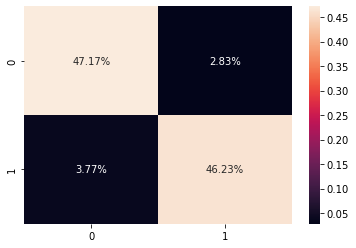

In [71]:
#confusion_matrix for oversampling
cm = confusion_matrix(y_resample_over, y_resample_over_pred)
sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues')

In [64]:
#Undersampling
from imblearn.under_sampling import RandomUnderSampler

ros = RandomUnderSampler(random_state=42, sampling_strategy='majority')
x_resample_under, y_resample_under = ros.fit_resample(x_train, y_train)
x_resample_under

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
1506,1.04,0.00,0.52,0.0,0.52,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.309,0.000,0.309,0.000,0.000,3.973,34,151
2031,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.101,0.254,0.101,0.050,0.050,0.000,2.725,15,248
2209,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,3.888,8,35
2698,0.00,0.00,0.38,0.0,0.38,0.38,0.00,0.00,0.38,0.00,...,0.0,0.000,0.061,0.000,0.000,0.000,0.000,2.953,34,127
3391,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,2.333,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,0.00,0.00,0.73,0.0,0.36,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.000,0.604,0.181,0.000,3.787,58,356
1446,0.26,0.72,0.85,0.0,0.00,0.19,0.06,0.33,0.72,0.46,...,0.0,0.000,0.131,0.000,0.101,0.101,0.202,4.398,79,1280
1447,0.00,0.47,0.00,0.0,0.94,0.00,0.94,0.00,0.00,0.00,...,0.0,0.000,0.074,0.074,0.000,0.000,0.000,2.125,11,102
1448,0.00,0.00,0.00,0.0,0.00,0.00,1.96,0.00,0.00,0.00,...,0.0,0.163,0.489,0.000,0.326,0.000,0.000,2.300,12,46


In [65]:
# Logistic Regression with Oversampling

lr_reg = LogisticRegression(max_iter=500)
lr_reg.fit(x_resample_under, y_resample_under)

C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [66]:
#Evaluation of training set for Undersampling
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
y_resample_under_pred = lr_reg.predict(x_resample_under)

accuracy = accuracy_score(y_resample_under, y_resample_under_pred)
recall = recall_score(y_resample_under, y_resample_under_pred)
precision = precision_score(y_resample_under, y_resample_under_pred)
f1_score = f1_score(y_resample_under, y_resample_under_pred)

errors = pd.DataFrame({'Value': [accuracy, recall, precision, f1_score]}, index=['Accuracy', 'Recall', 'Precision', 'F1-score'])
errors

,Value
Accuracy,0.931034
Recall,0.922069
Precision,0.938904
F1-score,0.930411


In [67]:
# Logistic Regression with weighted Loss
from sklearn.linear_model import LogisticRegression
lr_reg = LogisticRegression(solver='newton-cg', class_weight='balanced')
lr_reg.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', solver='newton-cg')

In [68]:
#Evaluation of training set for weighted loss
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
y_weighted_pred = lr_reg.predict(x_train)

accuracy = accuracy_score(y_train, y_weighted_pred)
recall = recall_score(y_train, y_weighted_pred)
precision = precision_score(y_train, y_weighted_pred)
f1_score = f1_score(y_train, y_weighted_pred)

errors = pd.DataFrame({'Value': [accuracy, recall, precision, f1_score]}, index=['Accuracy', 'Recall', 'Precision', 'F1-score'])
errors

,Value
Accuracy,0.935598
Recall,0.926207
Precision,0.911745
F1-score,0.918919
